# Сжатие картинок с помощью SVD разложения
В этом задании нужно сделать сжатие изображения, сжатие с потерями. Для этого мы используем SVD разложение.

Примерный порядок действий:
1) Найти любую картинку,
2) Прочитать её с помощью библиотеки PIL
3) Преобразовать в numpy массив
4) Применить SVD к матрице - обязательно прочитайте справку по этой функции `np.linalg.svd`

**Примечание**: Цветная картинка представляет собой трёхканальное изображение RBG, поэтому напрямую SVD разложение применить не получится. Либо вы преобразуете изображение в одноканальное (градации серого), усредняя все три канала. Либо делаете SVD для всех трёх каналов в отдельности.

5) Далее оставляете небольшое количество сингулярных значений - 1, 2, 10, 30, 100. И выводите результат в виде получившейся картинки - чем больше сингулярных чисел, тем ближе приближённая матрица к исходной.

6) Сравните количество байт, необходимых для хранения исходной картинки и сжатой версии.

Ниже представлены основные функции и библиотеки, которые вам понадобятся.

Задание оформляете в виде блокнота jupyter. Особо понравившиеся картинки можно сохранить отдельно на диск, но мне удобнее чтобы они присутствовали в самом jupyter блокноте.

11073 14052 20521 25703 29471 200743


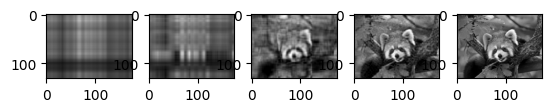

In [83]:
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt

img = Image.open('panda.jpg').convert('L')
img.save('panda_grey.png')
w, h = img.size
img = img.resize((w//4, h//4)) # можно не делать .resize(())
x = np.array(img, dtype=np.float32) # преобразование из PIL в numpy array

U, S, V = np.linalg.svd(x, full_matrices=False) # разложение SVD
n = [1,2,10,30,100]
Sn = np.zeros((len(n),len(S)))
for i in range(0,len(n)):
    Sn[i] = S.copy()
    for j in range(n[i],len(S)):
        Sn[i][j] = 0
#Задаём массивы разложения
svd1 = np.dot(U*Sn[0],V)
svd2 = np.dot(U*Sn[1],V)
svd3 = np.dot(U*Sn[2],V)
svd4 = np.dot(U*Sn[3],V)
svd5 = np.dot(U*Sn[4],V)
#Переводим массивы в изображение и сохраняем
data1 = Image.fromarray(svd1)
data1 = data1.convert("RGB")
data1.save('data1.png')
data2 = Image.fromarray(svd2)
data2 = data2.convert("RGB")
data2.save('data2.png')
data3 = Image.fromarray(svd3)
data3 = data3.convert("RGB")
data3.save('data3.png')
data4 = Image.fromarray(svd4)
data4 = data4.convert("RGB")
data4.save('data4.png')
data5 = Image.fromarray(svd5)
data5 = data5.convert("RGB")
data5.save('data5.png')
#Выводим кол-во байт для картинки: получили что вес разложения примерно в 20 раз меньше
print(os.path.getsize('data1.png') ,
os.path.getsize('data2.png') ,
 os.path.getsize('data3.png') ,
 os.path.getsize('data4.png') ,
 os.path.getsize('data5.png') ,
 os.path.getsize('panda_grey.png'))
figure, axis = plt.subplots(1, 5)
axis[0].imshow(data1)
axis[0].set_label("$singular points = 1$")
axis[1].imshow(data2)
axis[1].set_label("$singular points = 10$")
axis[2].imshow(data3)
axis[2].set_label("$singular points = 20$")
axis[3].imshow(data4)
axis[3].set_label("$singular points = 30$")
axis[4].imshow(data5)
axis[4].set_label("$singular points = 100$")
plt.show()